# TODO Needs Comments


In [1]:
import organoid_prediction_python as opp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

home_directory = r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation/"
table_location = home_directory + "tabular_data"

translation_frame = pd.read_csv("translation_dataframe_timepoints.csv")
name_mapping = {key:new_key for key,new_key in zip(translation_frame["original_names"],translation_frame["plot_names"])}

data = pd.read_csv(f"{table_location}/All_Samples_Feature_Space_All_Features_48h,72h,96h_Normalised_per_Timepoint.csv")
data

Run  Plate   ID  048h_raw_BF_AreaShape_area  \
0    RR      1   A1                    0.754091   
1    RR      1   A2                   -0.783470   
2    RR      1   A3                    1.636441   
3    RR      1   A4                   -0.525754   
4    RR      1   A5                    0.537872   
..   ..    ...  ...                         ...   
762  TR      2   H8                   -0.342295   
763  TR      2   H9                   -0.925432   
764  TR      2  H10                   -1.873304   
765  TR      2  H11                   -2.408392   
766  TR      2  H12                   -1.204989   

     048h_raw_BF_AreaShape_aspect_ratio  \
0                             -0.889636   
1                             -1.252670   
2                             -0.184192   
3                             -0.513477   
4                             -0.248943   
..                                  ...   
762                           -0.103644   
763                            1.281638   
764                           -1.279234   
765                           -0.915375   
766                           -1.054547   

     048h_raw_BF_AreaShape_axis_major_length  \
0                                   0.132588   
1                                  -1.238409   
2                                   1.186196   
3                                  -0.672134   
4                                   0.294790   
..                                       ...   
762                                -0.319022   
763                                -0.116354   
764                                -2.131125   
765                                -2.411391   
766                                -1.484010   

     048h_raw_BF_AreaShape_axis_minor_length  \
0                                   1.204628   
1                                   0.003129   
2                                   1.565451   
3                                  -0.202863   
4                                   0.612413   
..                                       ...   
762                                -0.266071   
763                                -1.536867   
764                                -1.049808   
765                                -1.803167   
766                                -0.531492   

     048h_raw_BF_AreaShape_eccentricity  \
0                             -1.000051   
1                             -1.752936   
2                             -0.008740   
3                             -0.422446   
4                             -0.084969   
..                                  ...   
762                            0.083062   
763                            1.304509   
764                           -1.821515   
765                           -1.045366   
766                           -1.308189   

     048h_raw_BF_AreaShape_feret_diameter_max  \
0                                    0.007074   
1                                   -1.131530   
2                                    1.127225   
3                                   -0.849309   
4                                    0.059492   
..                                        ...   
762                                 -0.511010   
763                                 -0.330223   
764                                 -2.016265   
765                                 -2.414625   
766                                 -1.523914   

     048h_raw_BF_AreaShape_perimeter  ...  096h_str_BF_AreaShape_moments_hu_1  \
0                           0.615519  ...                           -0.769984   
1                          -0.724230  ...                           -0.587974   
2                           1.795347  ...                           -0.724302   
3                          -0.402853  ...                            0.276192   
4                           0.498737  ...                            0.544892   
..                               ...  ...                                 ...   
762                        -0.233997  ...      

In [2]:
annotations = table_location + "/annotations_with_indices.csv"
annotation_df = pd.read_csv(annotations)
mapping = {"Real_Run":"RR", "Trial_Run":"TR"}
annotation_df["Run"] = [mapping[value] for value in annotation_df["Run"].to_numpy()]
no_na_annot = annotation_df[annotation_df["Morph_Class"]!="NA_NA"]

data_annotated = data.set_index(["Run","Plate","ID"]).merge(no_na_annot,on=["Run","Plate","ID"])
data_annotated

Run  Plate   ID  048h_raw_BF_AreaShape_area  \
0    RR      1   A1                    0.754091   
1    RR      1   A2                   -0.783470   
2    RR      1   A3                    1.636441   
3    RR      1   A4                   -0.525754   
4    RR      1   A5                    0.537872   
..   ..    ...  ...                         ...   
433  TR      2   H8                   -0.342295   
434  TR      2   H9                   -0.925432   
435  TR      2  H10                   -1.873304   
436  TR      2  H11                   -2.408392   
437  TR      2  H12                   -1.204989   

     048h_raw_BF_AreaShape_aspect_ratio  \
0                             -0.889636   
1                             -1.252670   
2                             -0.184192   
3                             -0.513477   
4                             -0.248943   
..                                  ...   
433                           -0.103644   
434                            1.281638   
435                           -1.279234   
436                           -0.915375   
437                           -1.054547   

     048h_raw_BF_AreaShape_axis_major_length  \
0                                   0.132588   
1                                  -1.238409   
2                                   1.186196   
3                                  -0.672134   
4                                   0.294790   
..                                       ...   
433                                -0.319022   
434                                -0.116354   
435                                -2.131125   
436                                -2.411391   
437                                -1.484010   

     048h_raw_BF_AreaShape_axis_minor_length  \
0                                   1.204628   
1                                   0.003129   
2                                   1.565451   
3                                  -0.202863   
4                                   0.612413   
..                                       ...   
433                                -0.266071   
434                                -1.536867   
435                                -1.049808   
436                                -1.803167   
437                                -0.531492   

     048h_raw_BF_AreaShape_eccentricity  \
0                             -1.000051   
1                             -1.752936   
2                             -0.008740   
3                             -0.422446   
4                             -0.084969   
..                                  ...   
433                            0.083062   
434                            1.304509   
435                           -1.821515   
436                           -1.045366   
437                           -1.308189   

     048h_raw_BF_AreaShape_feret_diameter_max  \
0                                    0.007074   
1                                   -1.131530   
2                                    1.127225   
3                                   -0.849309   
4                                    0.059492   
..                                        ...   
433                                 -0.511010   
434                                 -0.330223   
435                                 -2.016265   
436                                 -2.414625   
437                                 -1.523914   

     048h_raw_BF_AreaShape_perimeter  ...  096h_str_BF_AreaShape_moments_hu_4  \
0                           0.615519  ...                           -0.081040   
1                          -0.724230  ...                           -0.080919   
2                           1.795347  ...                           -0.081045   
3                          -0.402853  ...                           -0.073034   
4                           0.498737  ...                           -0.081127   
..                               ...  ...                                 ...   
433                        -0.233997  ...      

In [3]:
#data_annotated.keys().to_numpy()

In [4]:
dat_morph = data_annotated[data_annotated["Morph"] != "unclassified"]
dat_morph = dat_morph[dat_morph['048h_raw_BF_AreaShape_area'].notna()].dropna(axis=1).dropna()
dat_morph = dat_morph.drop([key for key in dat_morph.keys() if any([term in key for term in ["Location","orientation","_X","_Y","UMAP","PC","096"]])],axis=1) #,
dat_morph

Run  Plate   ID  048h_raw_BF_AreaShape_area  \
0    RR      1   A1                    0.754091   
1    RR      1   A2                   -0.783470   
2    RR      1   A3                    1.636441   
3    RR      1   A4                   -0.525754   
4    RR      1   A5                    0.537872   
..   ..    ...  ...                         ...   
429  TR      2   H4                   -1.801231   
430  TR      2   H5                   -1.805599   
434  TR      2   H9                   -0.925432   
436  TR      2  H11                   -2.408392   
437  TR      2  H12                   -1.204989   

     048h_raw_BF_AreaShape_aspect_ratio  \
0                             -0.889636   
1                             -1.252670   
2                             -0.184192   
3                             -0.513477   
4                             -0.248943   
..                                  ...   
429                            0.189615   
430                            0.135760   
434                            1.281638   
436                           -0.915375   
437                           -1.054547   

     048h_raw_BF_AreaShape_axis_major_length  \
0                                   0.132588   
1                                  -1.238409   
2                                   1.186196   
3                                  -0.672134   
4                                   0.294790   
..                                       ...   
429                                -1.378837   
430                                -1.400417   
434                                -0.116354   
436                                -2.411391   
437                                -1.484010   

     048h_raw_BF_AreaShape_axis_minor_length  \
0                                   1.204628   
1                                   0.003129   
2                                   1.565451   
3                                  -0.202863   
4                                   0.612413   
..                                       ...   
429                                -1.801012   
430                                -1.768377   
434                                -1.536867   
436                                -1.803167   
437                                -0.531492   

     048h_raw_BF_AreaShape_eccentricity  \
0                             -1.000051   
1                             -1.752936   
2                             -0.008740   
3                             -0.422446   
4                             -0.084969   
..                                  ...   
429                            0.392510   
430                            0.338334   
434                            1.304509   
436                           -1.045366   
437                           -1.308189   

     048h_raw_BF_AreaShape_feret_diameter_max  \
0                                    0.007074   
1                                   -1.131530   
2                                    1.127225   
3                                   -0.849309   
4                                    0.059492   
..                                        ...   
429                                 -1.263560   
430                                 -1.393948   
434                                 -0.330223   
436                                 -2.414625   
437                                 -1.523914   

     048h_raw_BF_AreaShape_perimeter  ...  072h_str_BF_AreaShape_moments_hu_3  \
0                           0.615519  ...                           -0.090511   
1                          -0.724230  ...                            0.041954   
2                           1.795347  ...                            0.187342   
3                          -0.402853  ...                           -0.251460   
4                           0.498737  ...                            2.862632   
..                               ...  ...                                 ...   
429                        -1.668959  ...      

In [5]:
counts = dat_morph.groupby("Morph")["Run"].count()
print(counts)

Morph
bad     183
good    128
Name: Run, dtype: int64


In [6]:
gt_keys = ["Run","Plate","ID","Axes","Morph","Morph_Class"]
X = dat_morph.drop(gt_keys,axis=1).rename(columns = name_mapping)
Y = pd.get_dummies(dat_morph["Morph"])["good"]
Y

0       True
1      False
2      False
3       True
4      False
       ...  
429     True
430    False
434     True
436     True
437     True
Name: good, Length: 311, dtype: bool

In [7]:
# import PLSRegression from scikitlearn
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
# fit the pls regression
my_plsr = PLSRegression(n_components=2, scale=False)
my_plsr.fit(StandardScaler().fit_transform(X), Y)

PLSRegression(scale=False)

In [8]:
# extract scores (one score per individual per component)
scores_df = pd.DataFrame(my_plsr.x_scores_)

# standardize scores between -1 and 1 so they fit on the plot
std_scores_dim1 = 2 * ( (scores_df[0] - min(scores_df[0])) / (max(scores_df[0]) - min(scores_df[0])) ) -1
std_scores_dim2 = 2 * ( (scores_df[1] - min(scores_df[1])) / (max(scores_df[1]) - min(scores_df[1])) ) -1



meta NOT subset; don't know how to subset; dropped


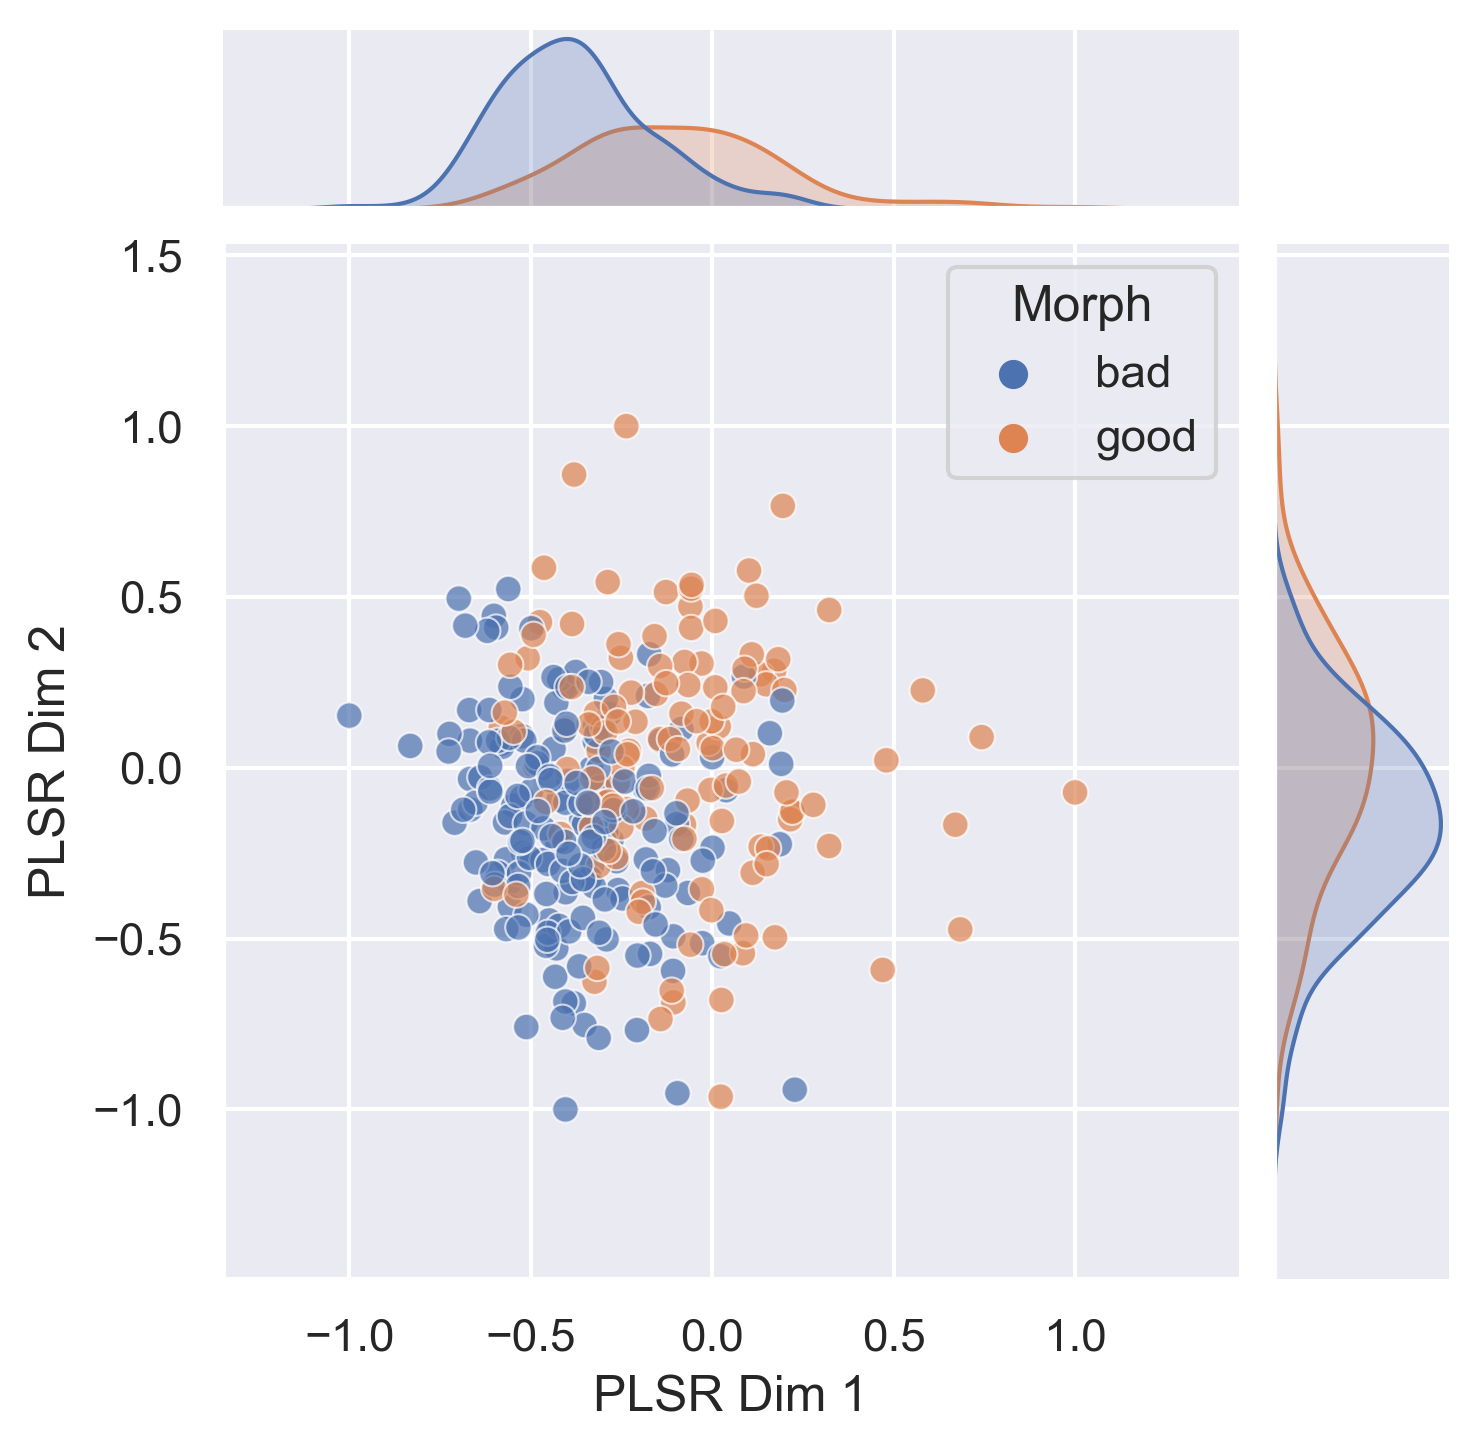

In [9]:
# create the biplot by plotting each data point individualle (one by one)
import matplotlib as mpl
import seaborn as sns

sns.set()

df_components = pd.DataFrame(
    {
        "Morph":dat_morph["Morph"].to_numpy(),
        "good":Y.to_numpy().astype(bool),
        "PLSR Dim 1":std_scores_dim1,
        "PLSR Dim 2":std_scores_dim2,
    }
)
out_PLSR = f"{home_directory}/Plots/PLSR Feature Plots/"
sns.jointplot(df_components,x="PLSR Dim 1",y="PLSR Dim 2",hue="Morph", **{"alpha":0.7,"s":40},height=5,hue_order=["bad","good"])
plt.savefig(f"{out_PLSR}/PLSR Morph components early features.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [10]:
sequenced_dataframe = pd.read_csv(f"{table_location}/Morphodata_All_Features_Sequenced_096h.csv")
sequenced_ids = sequenced_dataframe[["Plate","Sample"]].rename(columns={"Sample":"ID"})
sequenced_ids["Run"] = ["RR" for i in range(len(sequenced_ids))]
sequenced_w_features = data.merge(sequenced_ids,on=["Run","Plate","ID"])
X_seq_96 = sequenced_w_features.drop(["Run","Plate","ID"],axis=1)
X_seq_96 = X_seq_96.rename(columns = name_mapping)[X.columns].dropna()

sequenced_dataframe = pd.read_csv(f"{table_location}/Morphodata_All_Features_Sequenced_072h.csv")
sequenced_ids = sequenced_dataframe[["Plate","Sample"]].rename(columns={"Sample":"ID"})
sequenced_ids["Run"] = ["RR" for i in range(len(sequenced_ids))]
sequenced_w_features = data.merge(sequenced_ids,on=["Run","Plate","ID"])
X_seq_72 = sequenced_w_features.drop(["Run","Plate","ID"],axis=1)
X_seq_72 = X_seq_72.rename(columns = name_mapping)[X.columns].dropna()

In [11]:
sequenced_PLSR_vals_96 = my_plsr.transform(X_seq_96)
sequenced_scaled_vals_96 = np.array([2 * ( (sequenced_PLSR_vals_96[:,i] - min(scores_df[i])) / (max(scores_df[i]) - min(scores_df[i])) ) -1 for i in range(2)])
sequenced_scaled_vals_96

array([[-0.19657076, -0.39739362, -0.41952319, -0.32209287, -0.31964095,
        -0.33786727, -0.89054051, -0.50533505, -0.31637813, -0.72932592,
        -0.35530507, -0.27331454, -0.43441614, -0.5982797 , -0.36585943,
        -0.58175625, -0.085418  , -0.46118019, -0.48641598, -0.08725081,
        -0.29258193, -0.20712574, -0.16876028,  0.59635628],
       [-0.05705147, -0.15905546,  0.09128385,  0.06319666,  0.18629625,
         0.24415021,  0.49510947, -0.50208526,  0.25745183,  0.29798241,
         0.34530592,  0.0898497 , -0.25878056, -0.44774513, -0.05809925,
         0.07743617,  0.34692785,  0.31916689,  0.10983081,  0.23880034,
         0.05871943,  0.178058  ,  0.44549869,  0.75771567]])

In [12]:
sequenced_PLSR_vals_72 = my_plsr.transform(X_seq_72)
sequenced_scaled_vals_72 = np.array([2 * ( (sequenced_PLSR_vals_72[:,i] - min(scores_df[i])) / (max(scores_df[i]) - min(scores_df[i])) ) -1 for i in range(2)])
sequenced_scaled_vals_72

array([[-0.31248861, -0.47253683, -0.43170749, -0.34798496, -0.60228026,
        -0.57922314, -0.39467757, -0.50249271, -0.37263956, -0.36138064,
        -0.4970313 , -0.29363003, -0.56708765, -0.64713322, -0.53092425,
        -0.43841661, -0.49126569, -0.61826962, -0.34046348, -0.46094408,
        -0.59781364, -0.67963807, -0.65373746, -0.62097039, -0.45220549,
        -0.54515106, -0.53805603, -0.61792111, -0.32369582, -0.59267838,
        -0.39712491, -0.36637876, -0.35049628, -0.58796411, -0.49456602,
        -0.66116733, -0.27965797, -0.44083302, -0.27065872, -0.493717  ,
        -0.24900371, -0.57776284,  0.11457823, -0.09431019, -0.01719651,
        -0.05413416, -0.20252485,  0.15070645],
       [-0.17228275, -0.053161  ,  0.06877904, -0.12008675, -0.08193879,
        -0.165844  ,  0.0064689 , -0.14309141,  0.21498829, -0.1564112 ,
        -0.23412963,  0.06530542,  0.30790619, -0.21459528, -0.086299  ,
         0.05193607, -0.11570296, -0.04233803, -0.38401648, -0.18864941,
   

meta NOT subset; don't know how to subset; dropped


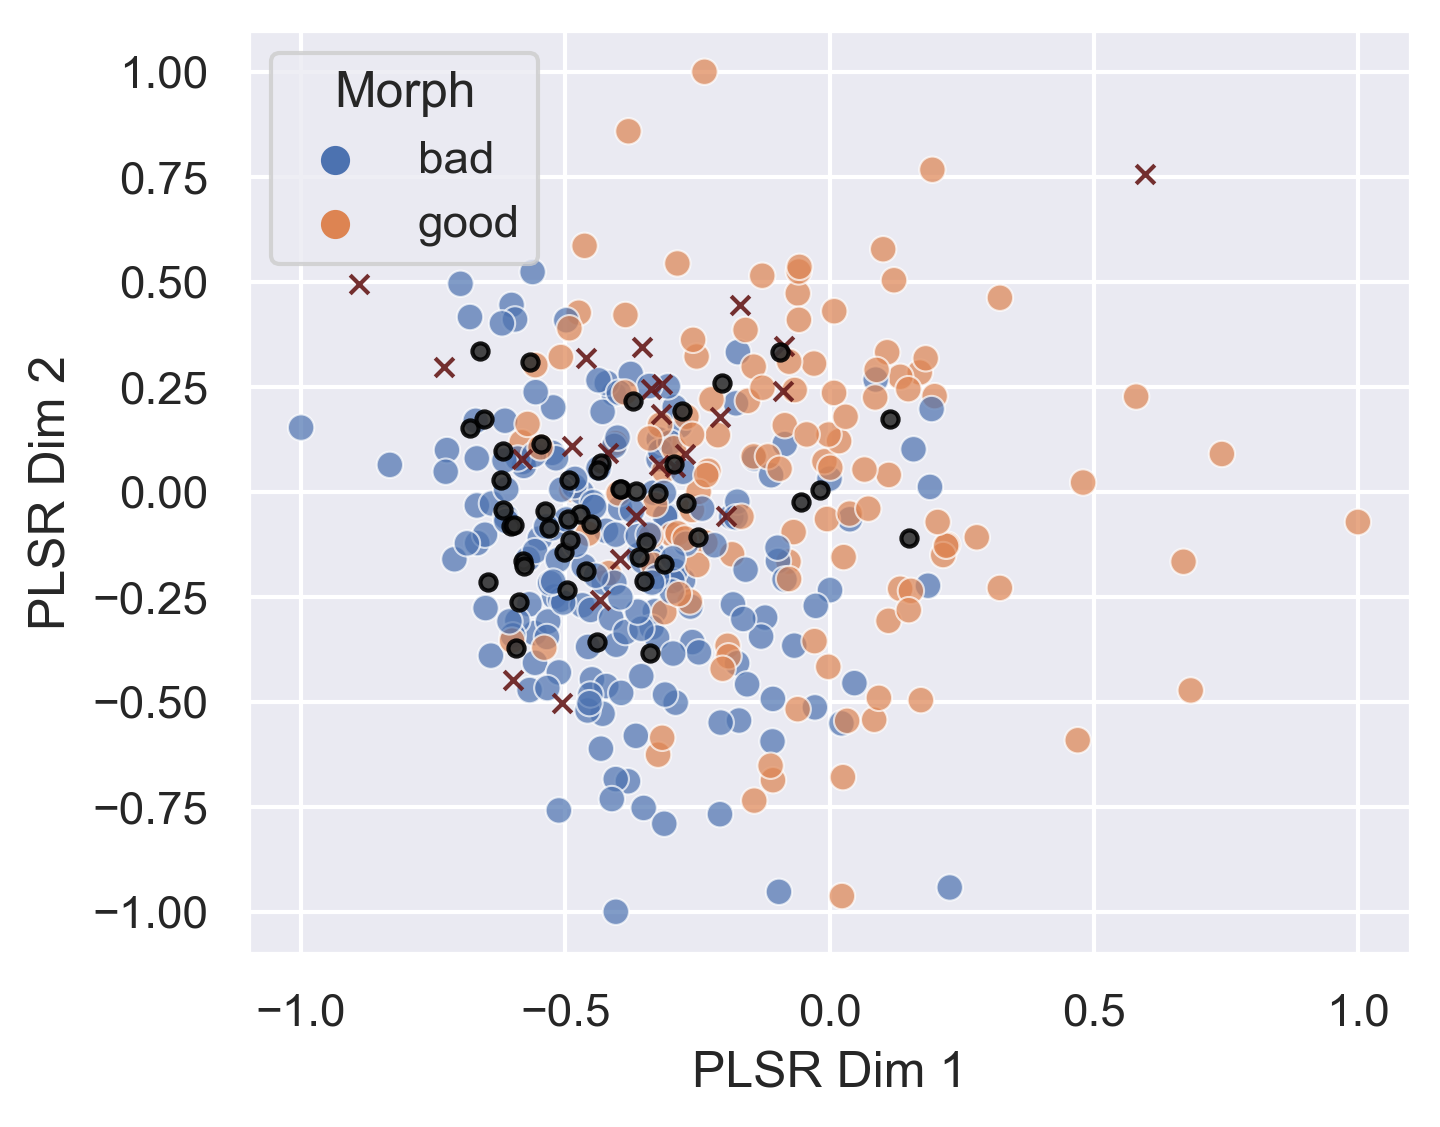

In [13]:
fig,ax = plt.subplots(figsize=(5,4))
sns.scatterplot(df_components,x="PLSR Dim 1",y="PLSR Dim 2",hue="Morph",hue_order=["bad","good"], **{"alpha":0.7,"s":40},ax=ax)
ax.scatter(sequenced_scaled_vals_96[0],sequenced_scaled_vals_96[1],c=[0.4,0.1,0.1],marker = "x",edgecolor = "black",linewidths=1,alpha = 0.9,s=20)
ax.scatter(sequenced_scaled_vals_72[0],sequenced_scaled_vals_72[1],c=[0.2,0.2,0.2],marker = "o",edgecolor = "black",linewidths=1,alpha = 0.9,s=15)

out_PLSR = f"{home_directory}/Plots/PLSR Feature Plots/"
plt.savefig(f"{out_PLSR}/PLSR Morph early features w 96h and 72h sequenced samples.pdf", format="pdf", bbox_inches="tight")

In [14]:
#extract loadings (one loading per variable per component)
loadings_df = pd.DataFrame(my_plsr.x_loadings_,index=X.columns,columns=["PLSR Dim 1","PLSR Dim 2"])
print(np.min(loadings_df),np.max(loadings_df))

-0.17270626921113844 0.2736742012327025


# Main Contributors (0.05 and 0.95 percentile)

meta NOT subset; don't know how to subset; dropped


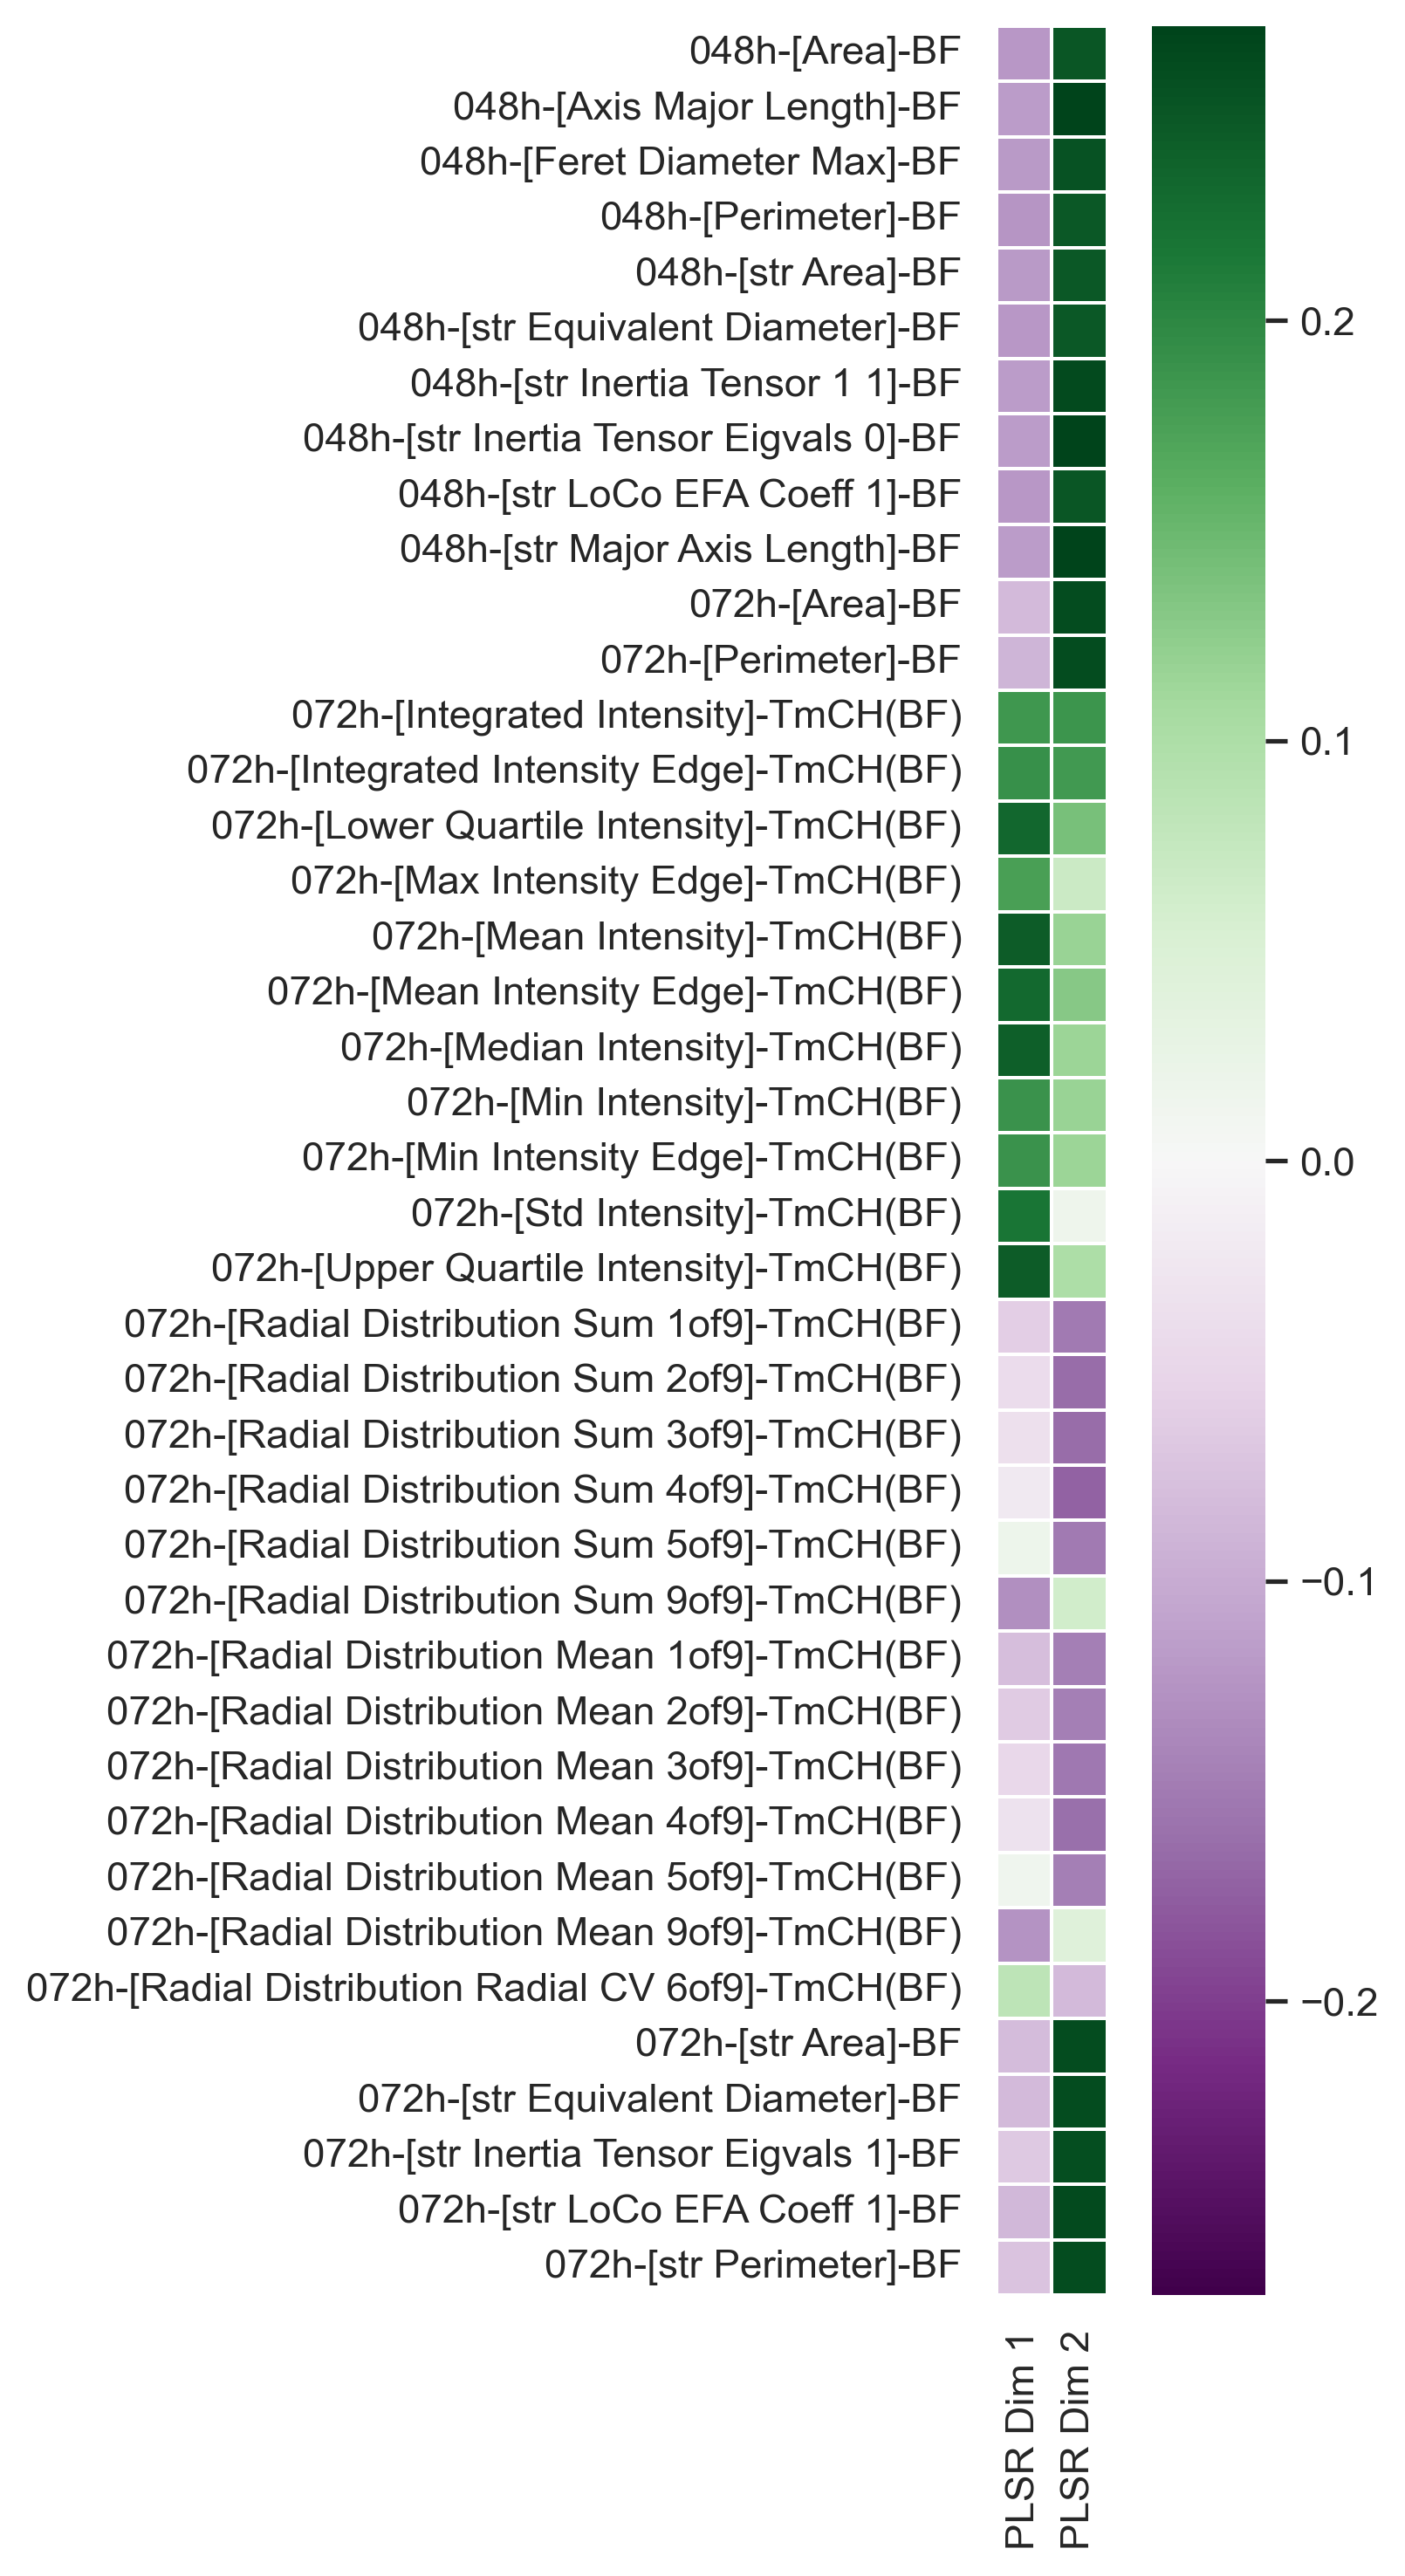

In [15]:
quantiles_upper = np.quantile(loadings_df,0.95,axis=0)
quantiles_lower = np.quantile(loadings_df,0.05,axis=0)
main_contributers = [
    key for key in loadings_df.index if (
        loadings_df.loc[key][0]>=quantiles_upper[0] or 
        loadings_df.loc[key][1]>=quantiles_upper[1] or 
        loadings_df.loc[key][0]<=quantiles_lower[0] or 
        loadings_df.loc[key][1]<=quantiles_lower[1]
    )
]

fig,ax = plt.subplots(1,1,figsize = (5,10))

sns.heatmap(loadings_df.loc[main_contributers], cmap = "PRGn",vmin=-0.27, vmax=0.27, xticklabels='auto', yticklabels='auto', ax=ax,linewidths=0.5,square=True)
ax.set_facecolor('white')

plt.tight_layout()
plt.savefig(f"{out_PLSR}/PLSR Morph early features loadings 0.05 quantile.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [16]:
main_contributers

['048h-[Area]-BF',
 '048h-[Axis Major Length]-BF',
 '048h-[Feret Diameter Max]-BF',
 '048h-[Perimeter]-BF',
 '048h-[str Area]-BF',
 '048h-[str Equivalent Diameter]-BF',
 '048h-[str Inertia Tensor 1 1]-BF',
 '048h-[str Inertia Tensor Eigvals 0]-BF',
 '048h-[str LoCo EFA Coeff 1]-BF',
 '048h-[str Major Axis Length]-BF',
 '072h-[Area]-BF',
 '072h-[Perimeter]-BF',
 '072h-[Integrated Intensity]-TmCH(BF)',
 '072h-[Integrated Intensity Edge]-TmCH(BF)',
 '072h-[Lower Quartile Intensity]-TmCH(BF)',
 '072h-[Max Intensity Edge]-TmCH(BF)',
 '072h-[Mean Intensity]-TmCH(BF)',
 '072h-[Mean Intensity Edge]-TmCH(BF)',
 '072h-[Median Intensity]-TmCH(BF)',
 '072h-[Min Intensity]-TmCH(BF)',
 '072h-[Min Intensity Edge]-TmCH(BF)',
 '072h-[Std Intensity]-TmCH(BF)',
 '072h-[Upper Quartile Intensity]-TmCH(BF)',
 '072h-[Radial Distribution Sum 1of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 2of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 3of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 4of9]-TmCH(BF)',
 '072h

In [17]:
axes_and_morph_contributers = ['048h-[Area]-BF',
 '048h-[Axis Major Length]-BF',
 '048h-[Feret Diameter Max]-BF',
 '048h-[Perimeter]-BF',
 '048h-[str Area]-BF',
 '048h-[str Equivalent Diameter]-BF',
 '048h-[str Inertia Tensor 1 1]-BF',
 '048h-[str Inertia Tensor Eigvals 0]-BF',
 '048h-[str Inertia Tensor Eigvals 1]-BF',
 '048h-[str LoCo EFA Coeff 1]-BF',
 '048h-[str LoCo EFA Coeff 2]-BF',
 '048h-[str Major Axis Length]-BF',
 '048h-[str Minor Axis Length]-BF',
 '072h-[Area]-BF',
 '072h-[Integrated Intensity Edge]-TmCH(BF)',
 '072h-[Integrated Intensity]-TmCH(BF)',
 '072h-[Lower Quartile Intensity]-TmCH(BF)',
 '072h-[Max Intensity Edge]-TmCH(BF)',
 '072h-[Mean Intensity Edge]-TmCH(BF)',
 '072h-[Mean Intensity]-TmCH(BF)',
 '072h-[Median Intensity]-TmCH(BF)',
 '072h-[Min Intensity Edge]-TmCH(BF)',
 '072h-[Min Intensity]-TmCH(BF)',
 '072h-[Perimeter]-BF',
 '072h-[Radial Distribution Mean 1of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 2of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 3of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 4of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 5of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 7of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 8of9]-TmCH(BF)',
 '072h-[Radial Distribution Mean 9of9]-TmCH(BF)',
 '072h-[Radial Distribution Radial CV 6of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 1of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 2of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 3of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 4of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 5of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 7of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 8of9]-TmCH(BF)',
 '072h-[Radial Distribution Sum 9of9]-TmCH(BF)',
 '072h-[Std Intensity]-TmCH(BF)',
 '072h-[Upper Quartile Intensity]-TmCH(BF)',
 '072h-[str Area]-BF',
 '072h-[str Equivalent Diameter]-BF',
 '072h-[str Inertia Tensor Eigvals 1]-BF',
 '072h-[str LoCo EFA Coeff 1]-BF',
 '072h-[str Minor Axis Length]-BF',
 '072h-[str Moments Hu 1]-BF',
 '072h-[str Perimeter]-BF']
len(axes_and_morph_contributers)

50

In [18]:
loadings_df.loc[axes_and_morph_contributers].to_excel(r"C:\Users\savill\OneDrive\Documents\PhD Jesse\Embryonic_organoid_prediction\Processing dataset for Paper\TLS_2D_morphostate_investigation\tabular_data\PLSR Morph early features loadings 0.05 quantile.xlsx")

meta NOT subset; don't know how to subset; dropped


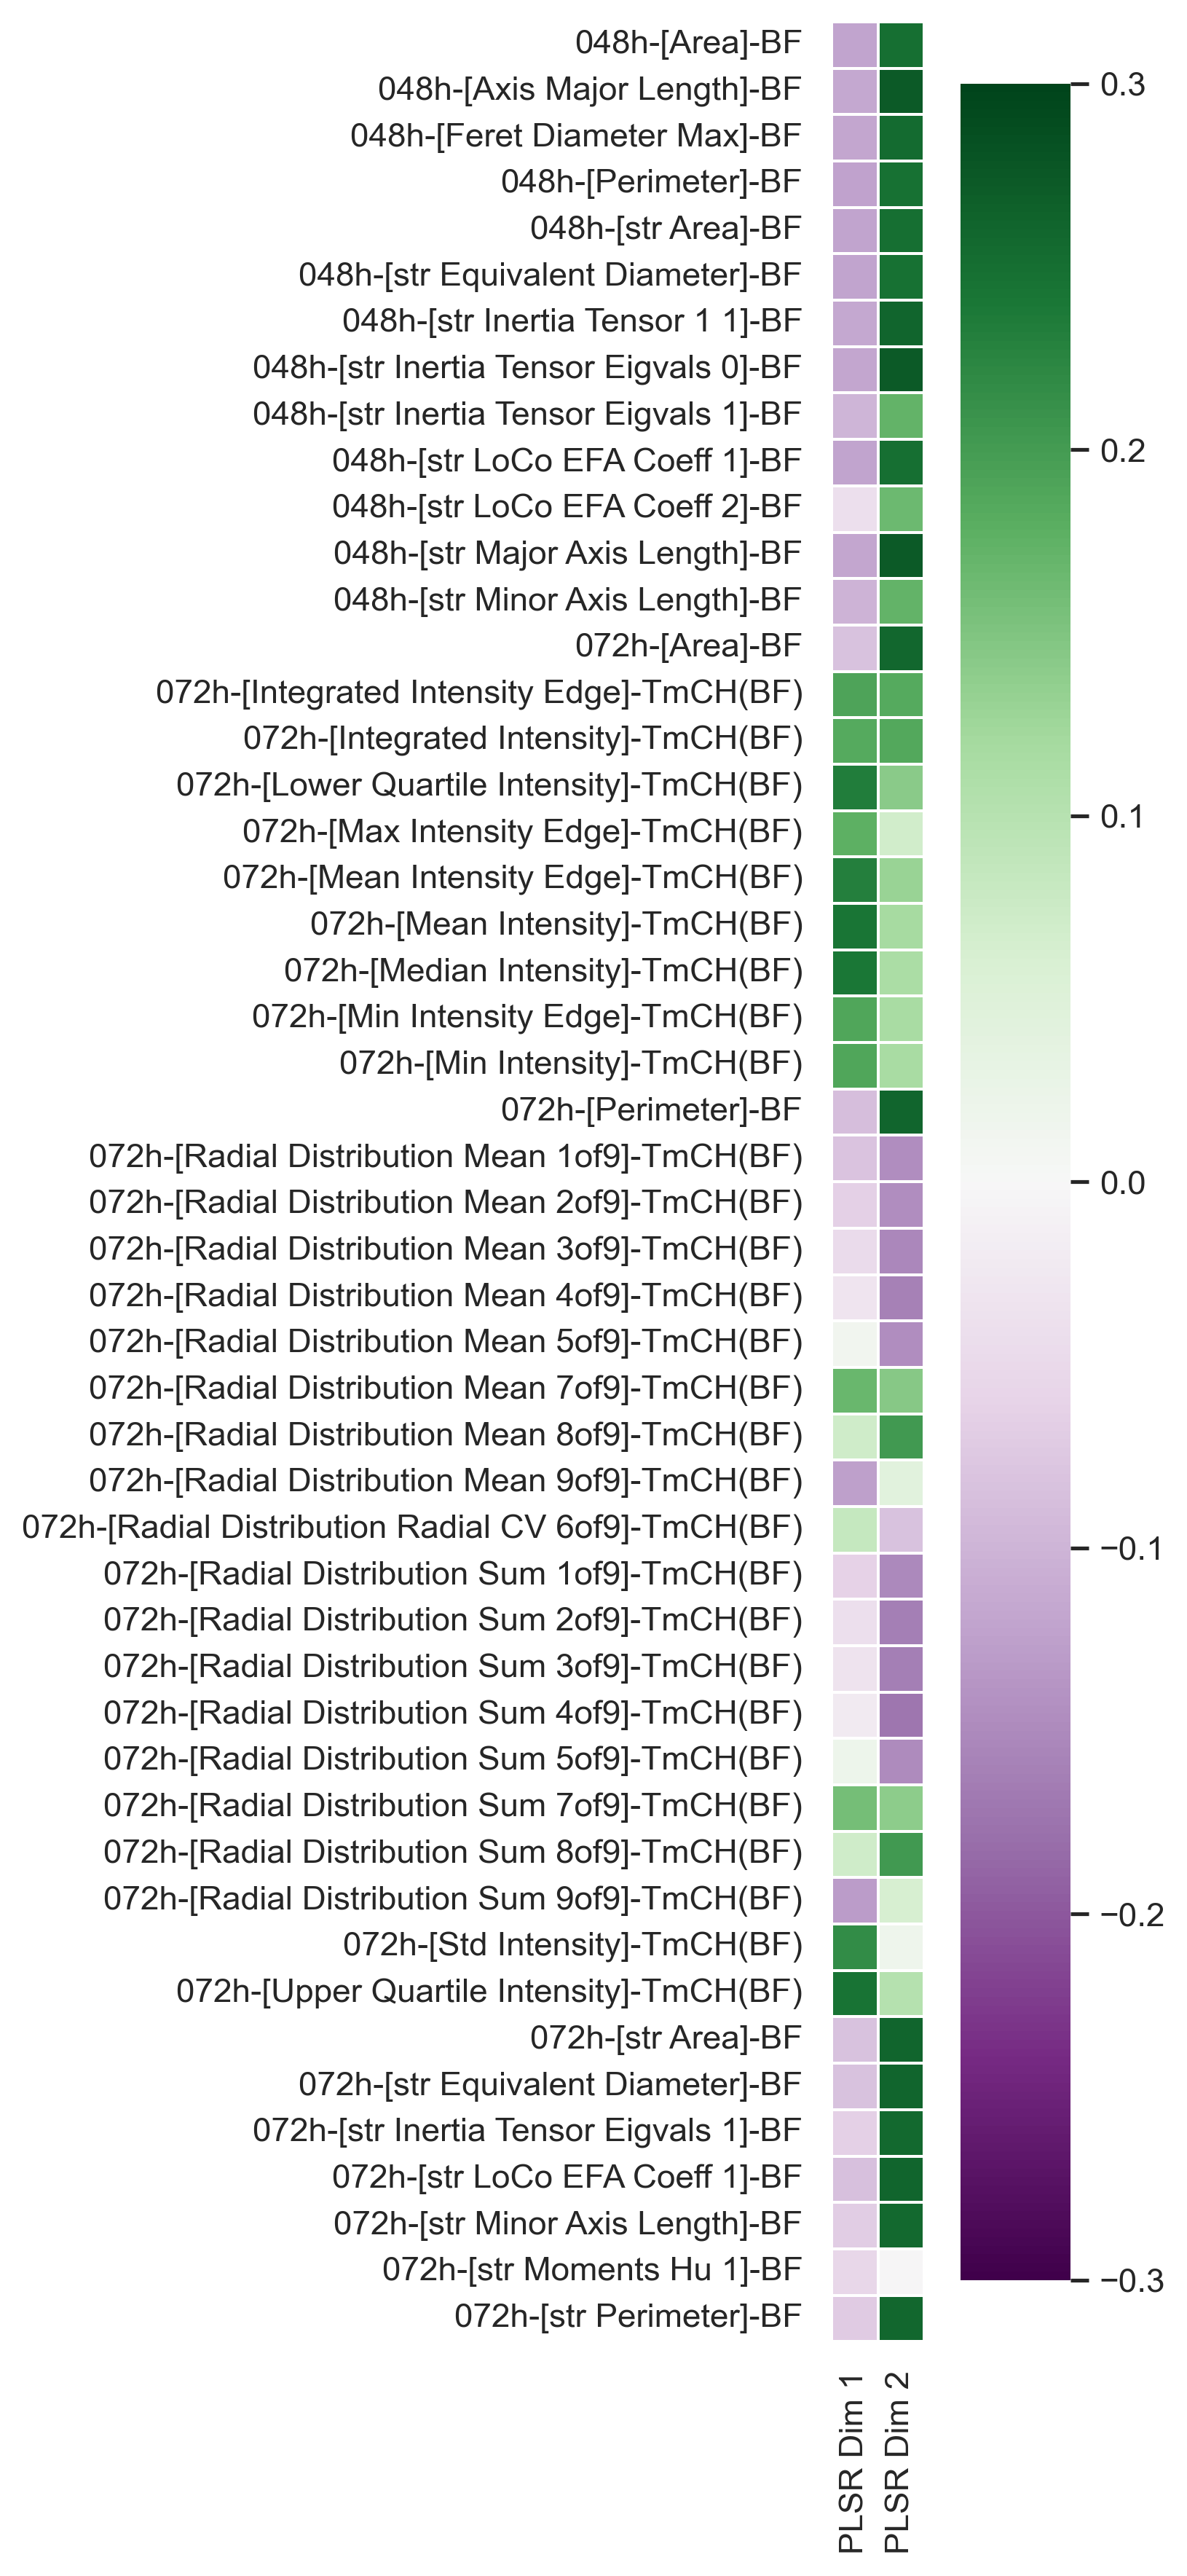

In [19]:
fig,ax = plt.subplots(1,1,figsize = (5,12))

sns.heatmap(loadings_df.loc[axes_and_morph_contributers], cmap = "PRGn",vmin=-0.3, vmax=0.3, xticklabels='auto', yticklabels='auto', ax=ax,linewidths=0.5,square=True)
ax.set_facecolor('white')

plt.tight_layout()
plt.savefig(f"{out_PLSR}/PLSR Morph early features loadings 0.05 quantile axes and morph.pdf", format="pdf", bbox_inches="tight")
plt.show()

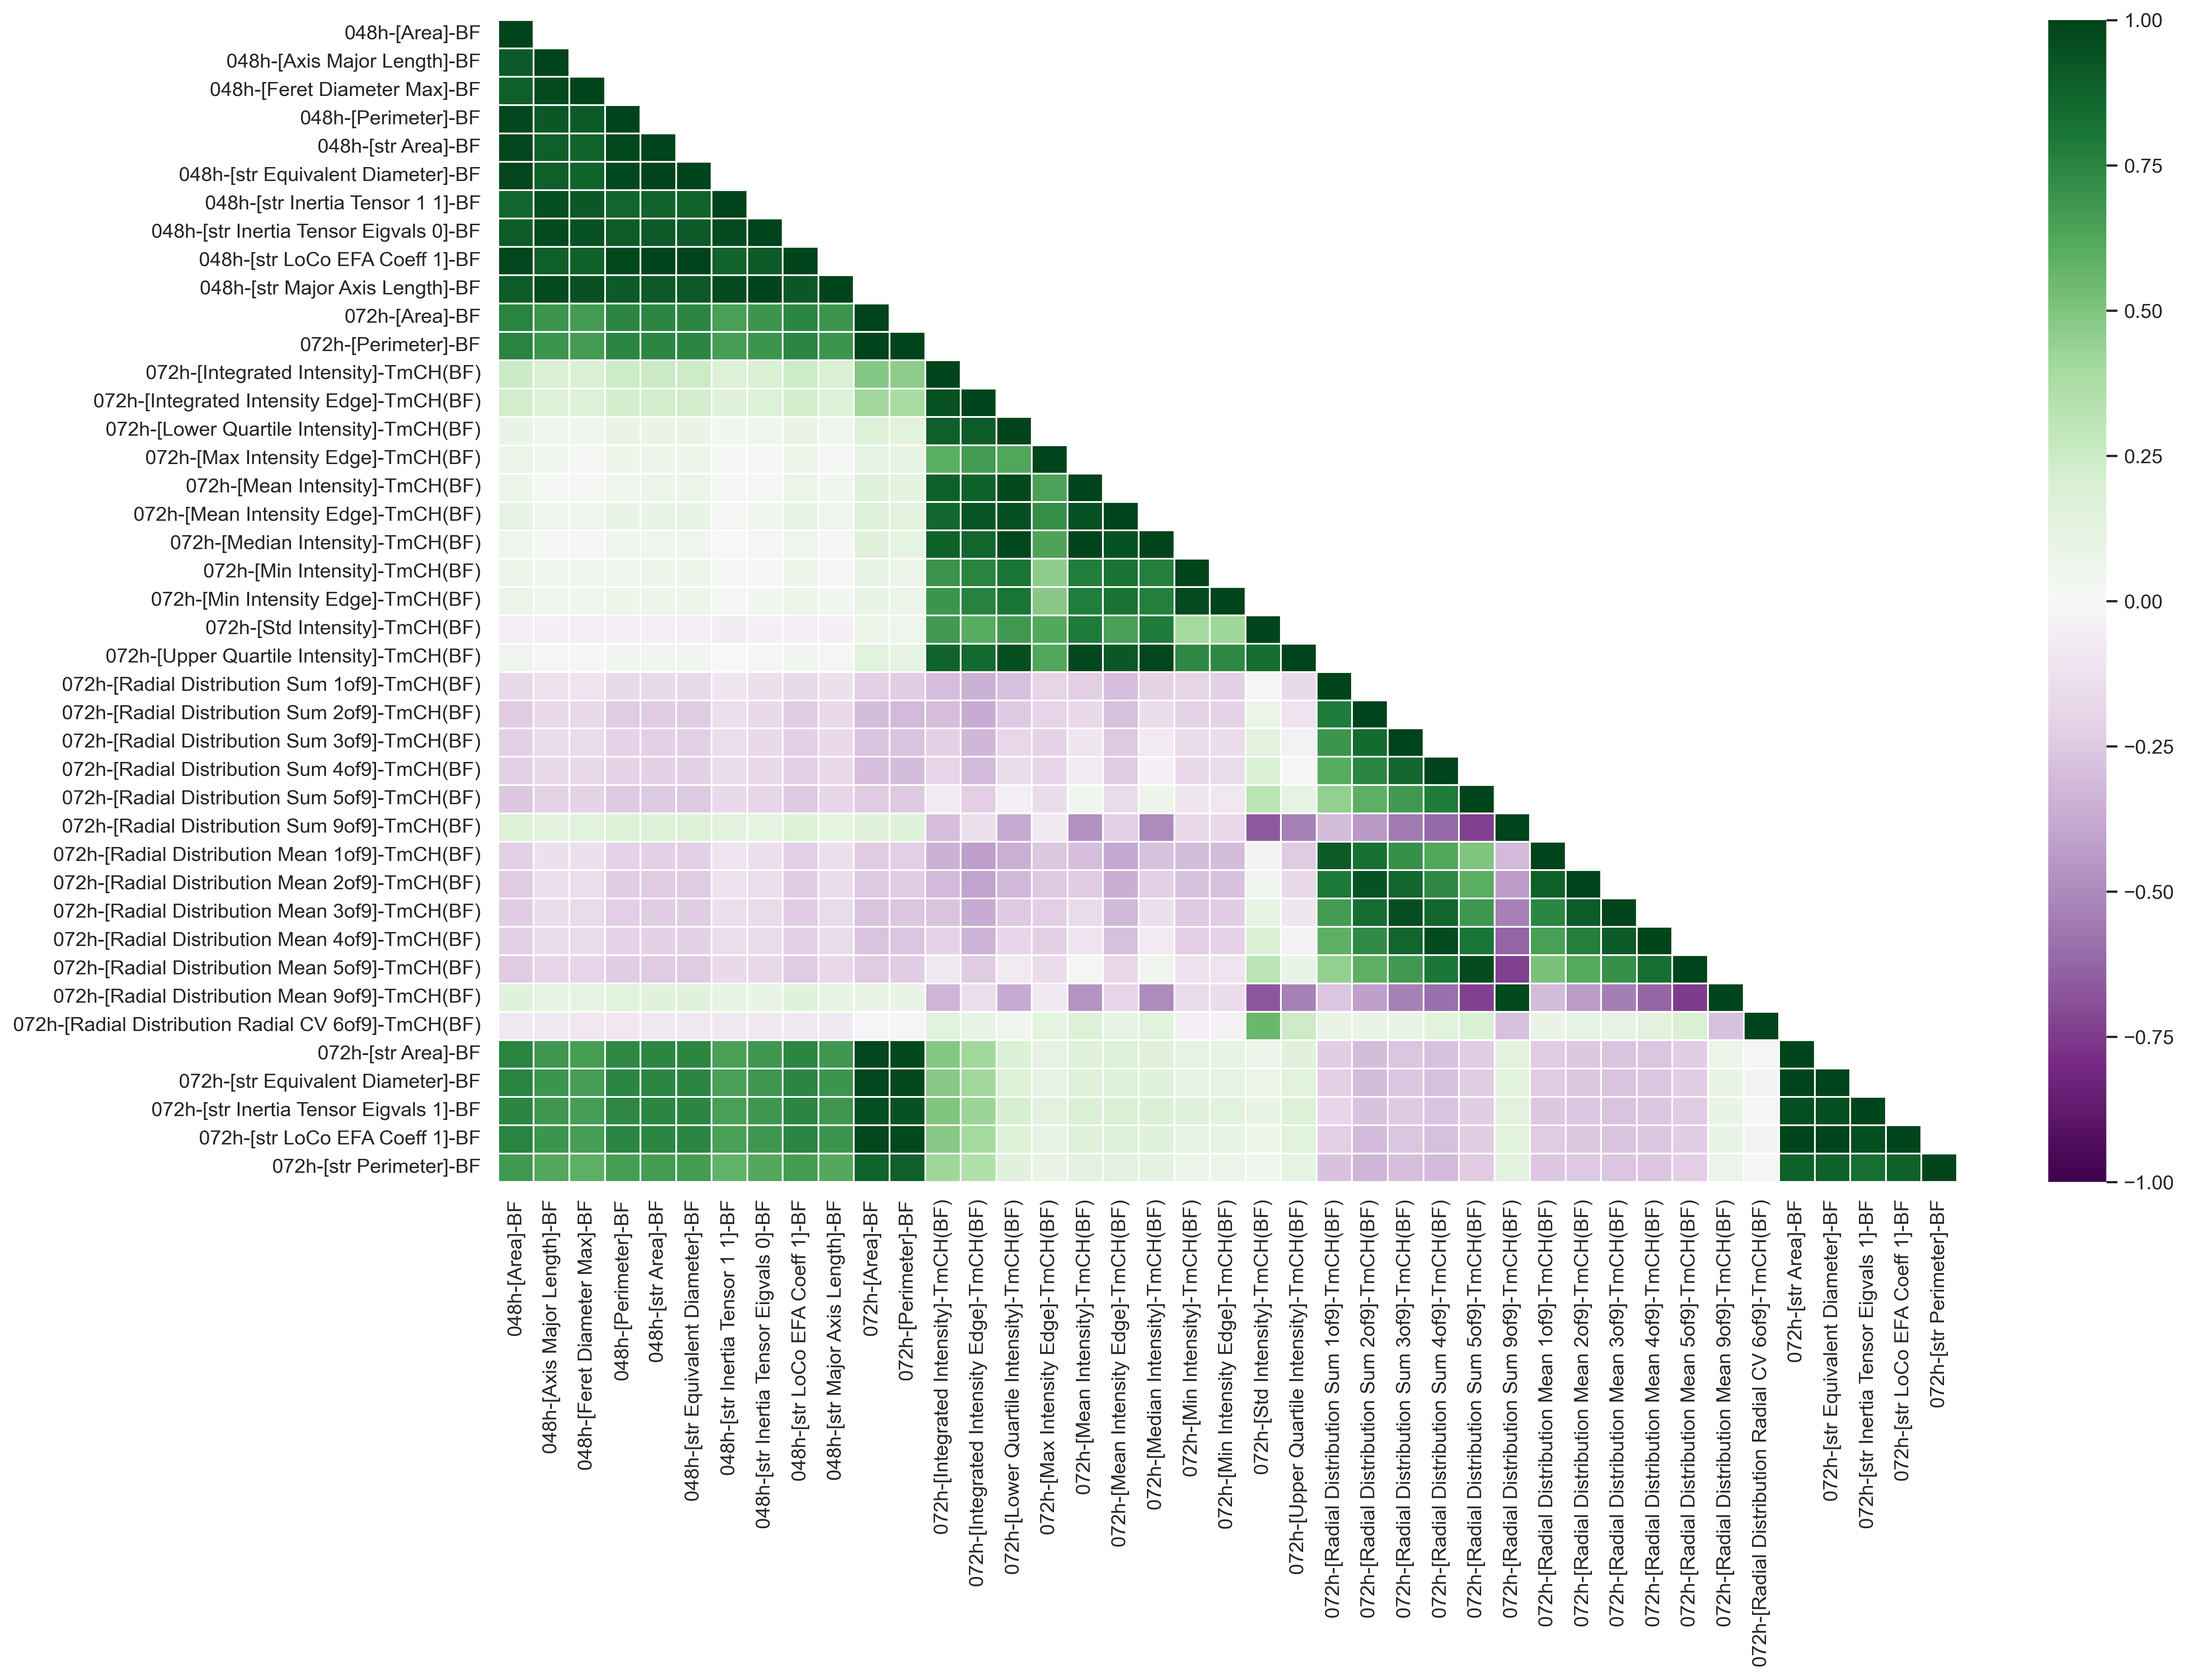

In [20]:
corr_analysis = X[main_contributers].corr()
fig,ax = plt.subplots(1,1,figsize = (18,13))

mask = np.ones(corr_analysis.shape, dtype= bool)
mask = np.triu(mask, k = 1)

sns.heatmap(corr_analysis, cmap = "PRGn",vmin=-1, vmax=1, xticklabels='auto', yticklabels='auto', mask=mask, ax=ax,linewidths=0.5)
ax.set_facecolor('white')

plt.tight_layout()
plt.show()